In [4]:
import tensorflow as tf
from tensorflow import  keras
tf.__version__ 

'2.1.0'

In [7]:
from tensorflow.keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [8]:
len(train_data) #25000篇評論

25000

In [9]:
max([max(sequence) for sequence in train_data]) #最大不重複單字數(索引)

9999

In [10]:
word_index=imdb.get_word_index()
print(word_index)

{'frogland': 61859, 'ogles': 40941, 'Êxtase': 62061, 'depart': 18529, "'korea'": 54299, 'toast': 12768, 'presentable': 42978, 'glinda': 87610, 'genn': 29274, 'taos': 40047, 'airphone': 81890, 'hauptmann': 35790, 'shoals': 75857, 'filmstock': 55202, '4f': 64344, 'babe': 4542, 'heffron': 64497, 'spasitc': 71119, 'unconsiousness': 68708, 'vamps': 32010, "'present'": 56323, 'cusamanos': 57301, 'circuited': 41983, 'zigzaggy': 67800, 'thine': 44345, 'semantic': 71977, 'sufferers': 33821, 'unassuredness': 79570, 's01e01': 85583, "'for": 35608, 'nightly': 17069, 'chirin': 38848, 'abortionists': 41339, 'protector': 12033, 'forelock': 81498, 'diseased': 25450, 'responds': 8303, 'darkheart': 28294, 'grumpiest': 75366, "'stop": 37527, 'final': 474, 'waldeman': 49345, 'property': 4859, 'pointed': 3378, 'mclaghlan': 73497, 'surpressors': 70658, 'stories': 534, 'pathologist': 33404, 'farnsworth': 9041, 'detraction': 36058, 'cyberpunk': 23595, 'flemming': 15489, 'medallion': 31725, 'paramedic': 42730,

In [11]:
reverse_word_index=dict((value,key) for key,value in word_index.items())
print(reverse_word_index)

{1: 'the', 2: 'and', 3: 'a', 4: 'of', 5: 'to', 6: 'is', 7: 'br', 8: 'in', 9: 'it', 10: 'i', 11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for', 16: 'with', 17: 'movie', 18: 'but', 19: 'film', 20: 'on', 21: 'not', 22: 'you', 23: 'are', 24: 'his', 25: 'have', 26: 'he', 27: 'be', 28: 'one', 29: 'all', 30: 'at', 31: 'by', 32: 'an', 33: 'they', 34: 'who', 35: 'so', 36: 'from', 37: 'like', 38: 'her', 39: 'or', 40: 'just', 41: 'about', 42: "it's", 43: 'out', 44: 'has', 45: 'if', 46: 'some', 47: 'there', 48: 'what', 49: 'good', 50: 'more', 51: 'when', 52: 'very', 53: 'up', 54: 'no', 55: 'time', 56: 'she', 57: 'even', 58: 'my', 59: 'would', 60: 'which', 61: 'only', 62: 'story', 63: 'really', 64: 'see', 65: 'their', 66: 'had', 67: 'can', 68: 'were', 69: 'me', 70: 'well', 71: 'than', 72: 'we', 73: 'much', 74: 'been', 75: 'bad', 76: 'get', 77: 'will', 78: 'do', 79: 'also', 80: 'into', 81: 'people', 82: 'other', 83: 'first', 84: 'great', 85: 'because', 86: 'how', 87: 'him', 88: 'most', 89: "don

In [12]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [13]:
import numpy as np

np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
def vectorize_sequences(sequences, dimension=10000):  
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.   
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [15]:
print(x_train[0]) #只標識哪些單字在該篇文章出現過，和排序無關
print(len(x_train[0]))

[0. 1. 1. ... 0. 0. 0.]
10000


In [16]:
y_train=np.asarray(train_labels).astype('float32') #標籤向量化
y_test=np.asarray(test_labels).astype('float32')

In [22]:
model=keras.Sequential([
    keras.layers.Dense(16,activation='relu',input_shape=(10000,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [25]:
x_val.shape

(10000, 10000)

In [26]:
y_val.shape

(10000,)

In [27]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))#驗證的資料與標籤

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/sample - loss: 0.5275 - accuracy: 0.7923 - val_loss: 0.4083 - val_accuracy: 0.8556
Epoch 2/20
15000/15000 [==============================] - 2s 119us/sample - loss: 0.3226 - accuracy: 0.8989 - val_loss: 0.3257 - val_accuracy: 0.8735
Epoch 3/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.2374 - accuracy: 0.9228 - val_loss: 0.2848 - val_accuracy: 0.8874
Epoch 4/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.1896 - accuracy: 0.9395 - val_loss: 0.2763 - val_accuracy: 0.8876
Epoch 5/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.1558 - accuracy: 0.9499 - val_loss: 0.3208 - val_accuracy: 0.8711
Epoch 6/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.1297 - accuracy: 0.9597 - val_loss: 0.2835 - val_accuracy: 0.8905
Epoch 7/20
15000/15000 [===========================

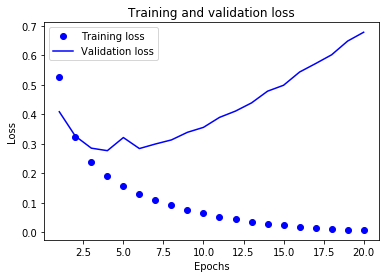

In [29]:
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

In [30]:
model=keras.Sequential([
    keras.layers.Dense(16,activation='relu',input_shape=(10000,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(x_train,
                 y_train,
                 epochs=4,
                 batch_size=512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 98us/sample - loss: 0.4573 - accuracy: 0.8212
Epoch 2/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.2643 - accuracy: 0.9086
Epoch 3/4
25000/25000 [==============================] - 1s 55us/sample - loss: 0.2015 - accuracy: 0.9291
Epoch 4/4
25000/25000 [==============================] - 1s 58us/sample - loss: 0.1668 - accuracy: 0.9414


In [33]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 4s 171us/sample - loss: 0.2951 - accuracy: 0.8835


[0.295117694568634, 0.88352]

In [34]:
model.predict(x_test)

array([[0.2114531 ],
       [0.9983265 ],
       [0.8960507 ],
       ...,
       [0.11125069],
       [0.07308223],
       [0.5294576 ]], dtype=float32)